#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Set maximum visibility of all columns and rows to look at whole data

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

#### Read all files 

In [3]:
app_data = pd.read_csv("application_data.csv")

In [4]:
app_data.shape

(307511, 122)

In [5]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
prev_app = pd.read_csv("previous_application.csv")

In [7]:
prev_app.shape

(1670214, 37)

In [8]:
col_des = pd.read_csv("columns_description.csv")

In [9]:
col_des.shape

(160, 5)

In [10]:
col_des.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


#### Checking for duplicates

In [11]:
app_data.duplicated().sum()

0

In [12]:
prev_app.duplicated().sum()

0

In [13]:
col_des.duplicated().sum()

0

# Removing unwanted columns from Application data

#### Removing umwanted columns from column description file

In [14]:
col_des = col_des.drop(["Special","Unnamed: 0"],axis=1)
pd.set_option("max_colwidth",400)

In [15]:
col_des

,Table,Row,Description
0,application_data,SK_ID_CURR,ID of loan in our sample
1,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,application_data,CODE_GENDER,Gender of the client
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car
5,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,application_data,CNT_CHILDREN,Number of children the client has
7,application_data,AMT_INCOME_TOTAL,Income of the client
8,application_data,AMT_CREDIT,Credit amount of the loan
9,application_data,AMT_ANNUITY,Loan annuity


#### Finding % of null values in each column

In [16]:
round(app_data.isnull().mean()*100,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

#### Removing columns with % null values greater than 45%

In [17]:
app_data = app_data.loc[:,app_data.isnull().mean()<=.45]

In [18]:
app_data.shape

(307511, 73)

#### Dropping other columns based on column description
    - Those columns that doesn't seem important for our target out 

In [19]:
app_data = app_data.drop(["NAME_TYPE_SUITE","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_WORK_PHONE","FLAG_PHONE",
                          "WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","AMT_REQ_CREDIT_BUREAU_HOUR",
                          "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
                          "AMT_REQ_CREDIT_BUREAU_QRT","DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE",
                          "OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","EXT_SOURCE_2",'REG_REGION_NOT_LIVE_REGION',
                          'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                          'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE'],axis=1)

In [20]:
app_data.shape

(307511, 49)

#### Checking if there are any columns where less than 10,000 people have not filled the forms 

In [21]:
base = "FLAG_DOCUMENT"
result = ["{}_{}".format(base,i)for i in range(2,22)]

In [22]:
del_flag_doc = []

for i in result:
    if app_data[i].value_counts()[0]<10000:
        del_flag_doc.append(i)
len(del_flag_doc)

0

#### All columns corresponding to Flag Documents can be dropped

In [23]:
for i in result:
    app_data = app_data.drop(i,axis=1)

#### Now we have 29 columns from initial 122 columns

In [24]:
app_data.shape

(307511, 29)

#### Checking for data type (if everyone has correct data type)

In [25]:
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_CONT_MOBILE                 int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
ORGANIZATION_TYPE        

# Finding and fixing missing values in Application Data

In [26]:
app_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
DAYS_EMPLOYED                      0
ORGANIZATION_TYPE                  0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
FLAG_EMAIL                         0
FLAG_CONT_MOBILE                   0
FLAG_EMP_PHONE                     0
FLAG_MOBIL                         0
SK_ID_CURR                         0
DAYS_BIRTH                         0
TARGET                             0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
FLAG_OWN_REALTY                    0
FLAG_OWN_CAR                       0
CODE_GENDER                        0
N

#### We have 7 columns with null values we have to either replace or drop

#### 1. Occupation has a large number of missing values which can not be droped or replaces with neither median as it is categorical, nor can be replaced with mode(most common job) 
So we create a category "Other"

In [27]:
app_data["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [28]:
app_data["OCCUPATION_TYPE"].fillna("Other",inplace=True)

In [29]:
app_data["OCCUPATION_TYPE"].isnull().sum()

0

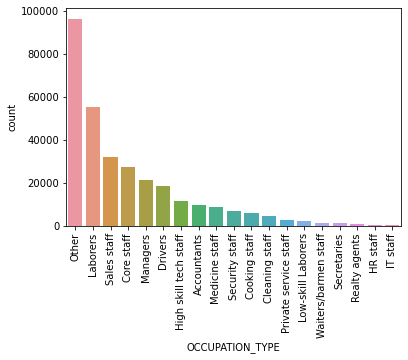

In [30]:
sns.countplot(x = app_data["OCCUPATION_TYPE"], order = app_data["OCCUPATION_TYPE"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### 2. EXT_SOURCE_3
- This is a normalised score given by external sources 
- Replace the null values with mean, because it has no outliers.
- Cannot assign it minimum value because it is possible that it is just lack of data from the source side.

In [31]:
app_data["EXT_SOURCE_3"].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [32]:
app_data["EXT_SOURCE_3"].fillna(app_data["EXT_SOURCE_3"].mode()[0],inplace=True)

In [33]:
app_data["EXT_SOURCE_3"].isnull().sum()

0

#### 3.  AMT_REQ_CREDIT_BUREAU_YEAR
- Signifies the number of enquires to credit bereau about the client
- A reaon for the values to be missing can be because there were no enquire.
- Replace null value with zero

In [34]:
app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [35]:
app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0.0,inplace=True)

In [36]:
app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

0

#### 4. AMT_GOODS_PRICE
    - Signifies the price of goods for which the loan is given
    - This can not be predicted, or be replaced with mean/median
    - Because the number of missing values are small, it is better to drop the data

In [37]:
app_data["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [38]:
app_data.dropna(axis=0,subset=["AMT_GOODS_PRICE"],inplace=True)

In [39]:
app_data["AMT_GOODS_PRICE"].isnull().sum()

0

#### 5. AMT_ANNUITY, CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE
- Missing values are very low in number (less than 15), so these rows can be droped

In [40]:
app_data.dropna(axis=0,subset=["AMT_ANNUITY"],inplace=True)

In [41]:
app_data["AMT_ANNUITY"].isnull().sum()

0

In [42]:
app_data.dropna(axis=0,subset=["CNT_FAM_MEMBERS"],inplace=True)

In [43]:
app_data["CNT_FAM_MEMBERS"].isnull().sum()

0

#### As we cannot convert non-finite values (NA or inf) to integer

In [44]:
app_data["CNT_FAM_MEMBERS"] = app_data["CNT_FAM_MEMBERS"].astype("int64")

In [45]:
app_data.dropna(axis=0,subset=["DAYS_LAST_PHONE_CHANGE"],inplace=True)

In [46]:
app_data["DAYS_LAST_PHONE_CHANGE"].isnull().sum()

0

### Checking for Correct Data Characterisation
- Categorical data

In [47]:
app_data.select_dtypes("object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

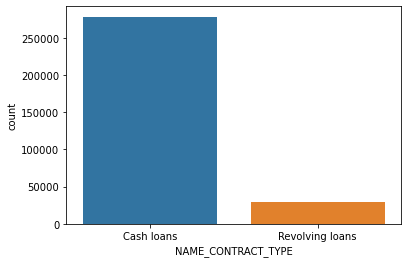

In [48]:
sns.countplot(x= app_data["NAME_CONTRACT_TYPE"],order=app_data["NAME_CONTRACT_TYPE"].value_counts().index)
plt.show()

In [49]:
app_data["CODE_GENDER"].value_counts()

F      202251
M      104965
XNA         4
Name: CODE_GENDER, dtype: int64

#### These XNA values can not be replaced with mode because this might be a human error or gender which is not mentioned in form
- Can't replace the values with mode
- Drop the values

In [50]:
app_data.drop(app_data[app_data["CODE_GENDER"]=="XNA"].index,inplace=True)

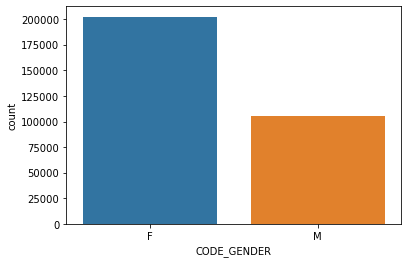

In [51]:
sns.countplot(x=app_data["CODE_GENDER"],order=app_data["CODE_GENDER"].value_counts().index)
plt.show()

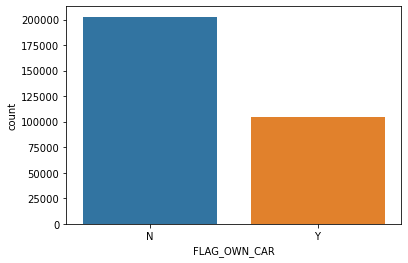

In [52]:
sns.countplot(x=app_data["FLAG_OWN_CAR"],order=app_data["FLAG_OWN_CAR"].value_counts().index)
plt.show()

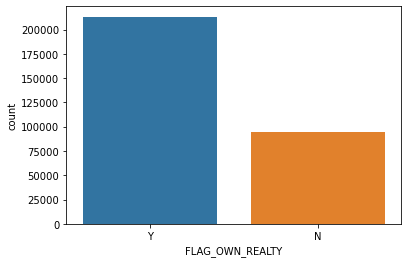

In [53]:
sns.countplot(x=app_data["FLAG_OWN_REALTY"],order=app_data["FLAG_OWN_REALTY"].value_counts().index)
plt.show()

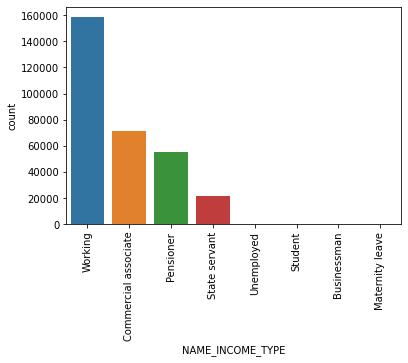

In [54]:
sns.countplot(x=app_data["NAME_INCOME_TYPE"],order=app_data["NAME_INCOME_TYPE"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

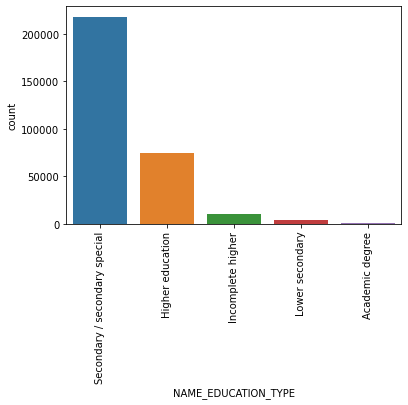

In [55]:
sns.countplot(x=app_data["NAME_EDUCATION_TYPE"],order=app_data["NAME_EDUCATION_TYPE"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

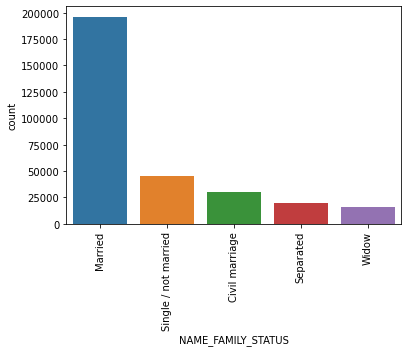

In [56]:
sns.countplot(x=app_data["NAME_FAMILY_STATUS"],order=app_data["NAME_FAMILY_STATUS"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

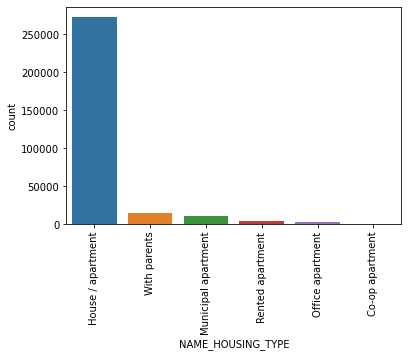

In [57]:
sns.countplot(x=app_data["NAME_HOUSING_TYPE"],order=app_data["NAME_HOUSING_TYPE"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

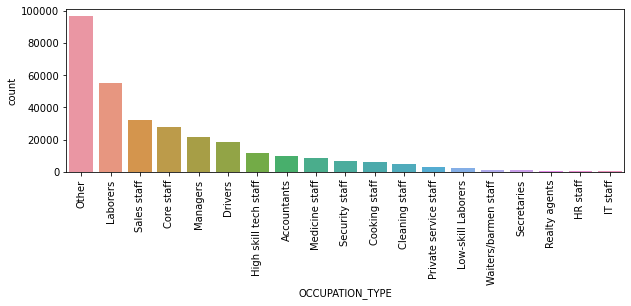

In [58]:
plt.figure(figsize=(10,3))
sns.countplot(x=app_data["OCCUPATION_TYPE"],order=app_data["OCCUPATION_TYPE"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

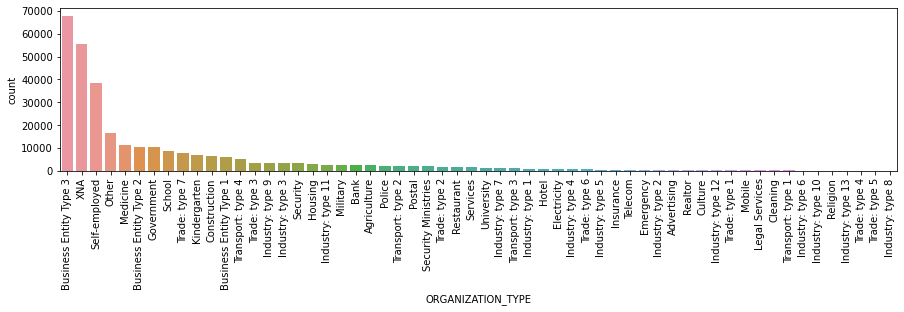

In [59]:
plt.figure(figsize=(15,3))
sns.countplot(x = app_data["ORGANIZATION_TYPE"], order = app_data["ORGANIZATION_TYPE"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### We see a majority of our clients are from Business type or Self Employed
- Let's check if there are any Business type or Self Employed and have Occupation type as "Other" which was initially "null"

In [60]:
app_data[((app_data["ORGANIZATION_TYPE"]=="Business Entity Type 3") & (app_data["OCCUPATION_TYPE"]=="Other"))].shape

(14323, 29)

In [61]:
app_data[((app_data["ORGANIZATION_TYPE"]=="Self-employed") & (app_data["OCCUPATION_TYPE"]=="Other"))].shape

(3541, 29)

In [62]:
app_data[((app_data["ORGANIZATION_TYPE"]=="Business Entity Type 2") & (app_data["OCCUPATION_TYPE"]=="Other"))].shape

(2264, 29)

#### Before renaming values in OCCUPATION_TYPE, checking other ORGANIZATION_TYPE

In [63]:
app_data[((app_data["ORGANIZATION_TYPE"]=="Industry: type 1") & (app_data["OCCUPATION_TYPE"]=="Other"))].shape

(153, 29)

In [64]:
app_data[((app_data["ORGANIZATION_TYPE"]=="Religion") & (app_data["OCCUPATION_TYPE"]=="Other"))].shape 

(21, 29)

#### Because "Other" has various types of organization, we can't add any of the Business Entity Type BUT we can add Entrepreneur in OCCUPATION_TYPE for Self-employed

In [65]:
app_data["OCCUPATION_TYPE"].mask((app_data["ORGANIZATION_TYPE"]=="Self-employed") & (app_data["OCCUPATION_TYPE"]=="Other"),"Entrepreneur",inplace=True)

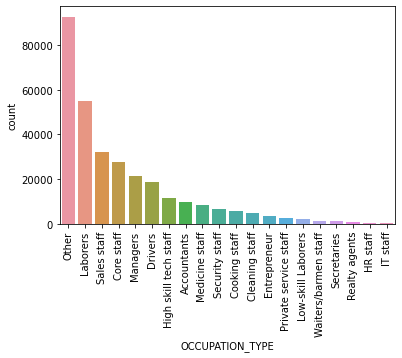

In [66]:
sns.countplot(x = app_data["OCCUPATION_TYPE"], order = app_data["OCCUPATION_TYPE"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### ORGANIZATION_TYPE has a large amount of XNA 
- But this can not be dropped because it is not missing
- And it can not be replace by mode because that can hamper the data analysis 

In [67]:
app_data["ORGANIZATION_TYPE"].mode()

0    Business Entity Type 3
dtype: object

# Checking for outliers in Application Data
- In Numerical data types
    - Numerical discrete

In [68]:
app_data.select_dtypes("int64").columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')

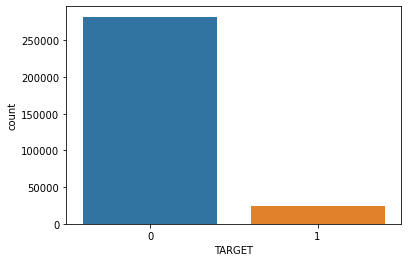

In [69]:
sns.countplot(x = app_data["TARGET"],order=app_data["TARGET"].value_counts().index)
plt.show()

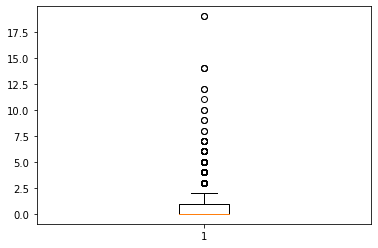

In [70]:
plt.boxplot(app_data["CNT_CHILDREN"])
plt.show()

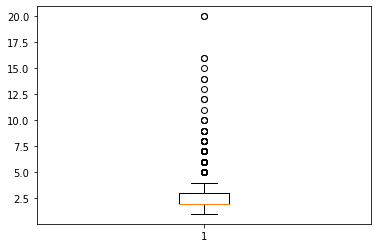

In [71]:
plt.boxplot(app_data["CNT_FAM_MEMBERS"])
plt.show()

In [72]:
app_data["CNT_CHILDREN"].value_counts(ascending=False)

0     215179
1      61050
2      26723
3       3711
4        427
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

#### To have 6 or above children seems to be exceptions.
-Drop values

In [73]:
app_data.drop(app_data[app_data["CNT_CHILDREN"]>5].index,inplace=True)

In [74]:
app_data["CNT_CHILDREN"].value_counts(ascending=False)

0    215179
1     61050
2     26723
3      3711
4       427
5        84
Name: CNT_CHILDREN, dtype: int64

In [75]:
app_data["DAYS_BIRTH"].value_counts(ascending=False)

-13749    43
-13481    42
-10020    41
-18248    41
-10292    40
-15771    40
-11664    39
-13263    39
-14267    39
-14395    39
-15565    38
-15042    38
-14791    38
-13891    38
-13480    38
-13584    38
-13788    38
-10192    37
-13217    37
-10107    37
-14767    37
-16257    37
-10136    37
-14790    37
-15450    37
-11108    37
-15563    37
-20074    37
-12806    37
-15048    37
-14276    37
-16690    37
-14890    37
-10519    36
-14926    36
-13634    36
-13904    36
-13708    36
-13643    36
-14386    36
-11524    36
-14137    36
-14776    36
-15322    36
-13271    36
-9981     35
-14120    35
-16830    35
-10123    35
-14131    35
-13706    35
-16490    35
-13687    35
-14825    35
-14099    35
-10088    35
-13273    35
-12682    35
-11266    35
-14384    35
-14297    35
-16185    35
-15044    35
-13254    35
-12776    35
-13922    35
-15155    35
-15073    35
-17873    35
-15009    35
-10213    35
-11588    35
-12433    35
-15901    35
-11135    35
-15164    35
-13909    34

#### Values in negative seems like a human error and days is too big a number, let's convert it into year
- For every column with "Days" in it

In [76]:
app_data["DAYS_EMPLOYED"] = app_data["DAYS_EMPLOYED"].abs()

In [77]:
app_data["DAYS_EMPLOYED"] = app_data["DAYS_EMPLOYED"]/(365)

In [78]:
app_data["DAYS_EMPLOYED"].describe()

count    307174.000000
mean        185.663088
std         382.133625
min           0.000000
25%           2.556164
50%           6.082192
75%          15.646575
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [79]:
app_data["DAYS_BIRTH"] = app_data["DAYS_BIRTH"].abs()

In [80]:
app_data["DAYS_BIRTH"] = app_data["DAYS_BIRTH"]/(365)

In [81]:
app_data["DAYS_LAST_PHONE_CHANGE"] = app_data["DAYS_LAST_PHONE_CHANGE"].abs()

In [82]:
app_data["DAYS_LAST_PHONE_CHANGE"] = app_data["DAYS_LAST_PHONE_CHANGE"]/(365)

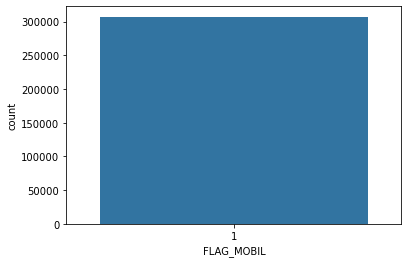

In [83]:
sns.countplot(x = app_data["FLAG_MOBIL"],order=app_data["FLAG_MOBIL"].value_counts().index)
plt.show()

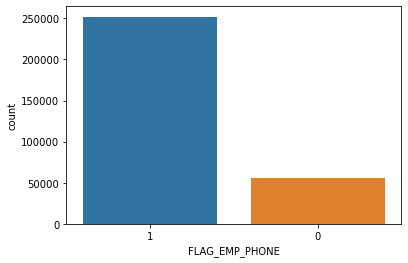

In [84]:
sns.countplot(x = app_data["FLAG_EMP_PHONE"],order=app_data["FLAG_EMP_PHONE"].value_counts().index)
plt.show()

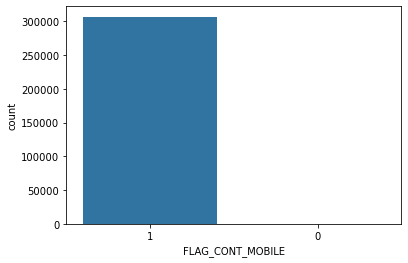

In [85]:
sns.countplot(x = app_data["FLAG_CONT_MOBILE"],order=app_data["FLAG_CONT_MOBILE"].value_counts().index)
plt.show()

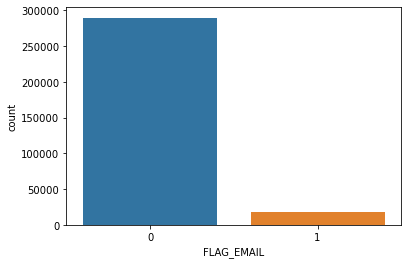

In [86]:
sns.countplot(x = app_data["FLAG_EMAIL"],order=app_data["FLAG_EMAIL"].value_counts().index)
plt.show()

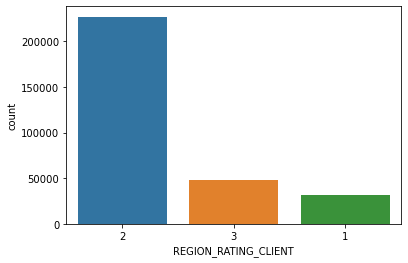

In [87]:
sns.countplot(x = app_data["REGION_RATING_CLIENT"],order=app_data["REGION_RATING_CLIENT"].value_counts().index)
plt.show()

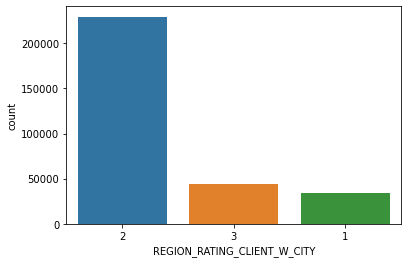

In [88]:
sns.countplot(x = app_data["REGION_RATING_CLIENT_W_CITY"],order=app_data["REGION_RATING_CLIENT_W_CITY"].value_counts().index)
plt.show()

In [89]:
app_data.select_dtypes("float64").columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

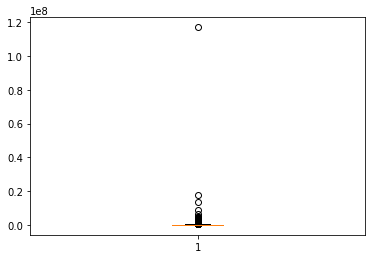

In [90]:
plt.boxplot(app_data["AMT_INCOME_TOTAL"])
plt.show()

In [91]:
app_data["AMT_INCOME_TOTAL"].quantile([0.5,0.7,0.8,0.9,0.95,0.99,1])

0.50       148500.0
0.70       180000.0
0.80       225000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [92]:
app_data.drop(app_data[app_data["AMT_INCOME_TOTAL"]>250000].index,inplace=True)

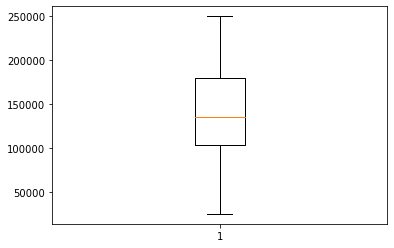

In [93]:
plt.boxplot(app_data["AMT_INCOME_TOTAL"])
plt.show()

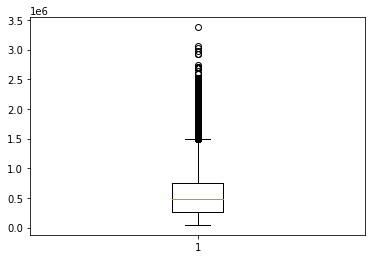

In [94]:
plt.boxplot(app_data["AMT_CREDIT"])
plt.show()

In [95]:
app_data["AMT_CREDIT"].quantile([0.5,0.7,0.8,0.9,0.95,0.99,1])

0.50     474385.5
0.70     675000.0
0.80     824823.0
0.90    1078200.0
0.95    1288350.0
0.99    1687266.0
1.00    3375000.0
Name: AMT_CREDIT, dtype: float64

In [96]:
app_data.drop(app_data[app_data["AMT_CREDIT"]>1000000].index,inplace=True)

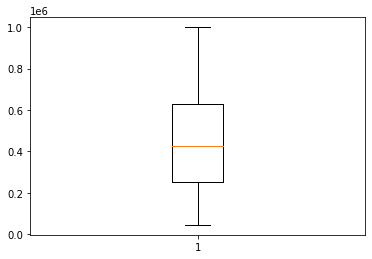

In [97]:
plt.boxplot(app_data["AMT_CREDIT"])
plt.show()

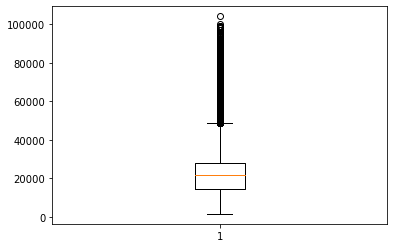

In [98]:
plt.boxplot(app_data["AMT_ANNUITY"])
plt.show()

In [99]:
app_data["AMT_ANNUITY"].quantile([0.5,0.7,0.8,0.9,0.95,0.99,1])

0.50     21775.50
0.70     26640.00
0.80     30078.00
0.90     35964.00
0.95     41948.55
0.99     54436.50
1.00    104094.00
Name: AMT_ANNUITY, dtype: float64

In [100]:
app_data.drop(app_data[app_data["AMT_ANNUITY"]>17000].index,inplace=True)

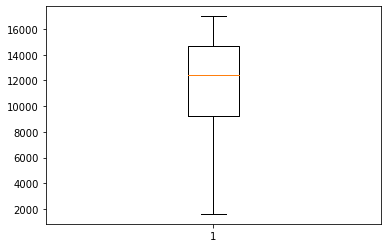

In [101]:
plt.boxplot(app_data["AMT_ANNUITY"])
plt.show()

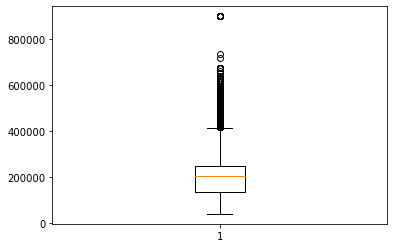

In [102]:
plt.boxplot(app_data["AMT_GOODS_PRICE"])
plt.show()

In [103]:
app_data["AMT_GOODS_PRICE"].quantile([0.5,0.7,0.8,0.9,0.95,0.99,1])

0.50    207000.0
0.70    238500.0
0.80    270000.0
0.90    315000.0
0.95    405000.0
0.99    486000.0
1.00    900000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [104]:
app_data.drop(app_data[app_data["AMT_GOODS_PRICE"]>200000].index,inplace=True)

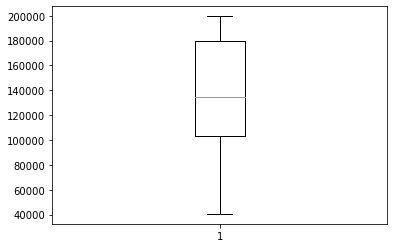

In [105]:
plt.boxplot(app_data["AMT_GOODS_PRICE"])
plt.show()

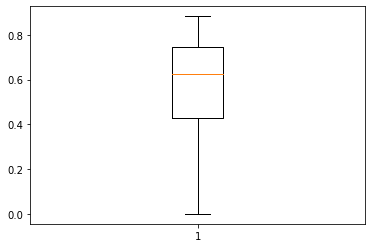

In [106]:
plt.boxplot(app_data["EXT_SOURCE_3"])
plt.show()

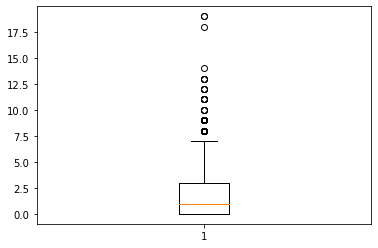

In [107]:
plt.boxplot(app_data["AMT_REQ_CREDIT_BUREAU_YEAR"])
plt.show()

In [108]:
app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].quantile([0.5,0.7,0.8,0.9,0.95,0.99,1])

0.50     1.0
0.70     2.0
0.80     3.0
0.90     4.0
0.95     5.0
0.99     8.0
1.00    19.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [109]:
app_data.drop(app_data[app_data["AMT_REQ_CREDIT_BUREAU_YEAR"]>8.0].index,inplace=True)

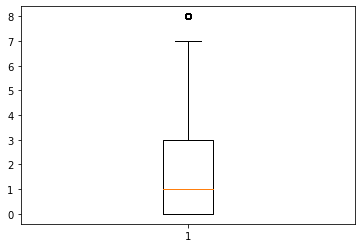

In [110]:
plt.boxplot(app_data["AMT_REQ_CREDIT_BUREAU_YEAR"])
plt.show()

## Removing columns from Previous Application

In [111]:
round(prev_app.isnull().mean()*100,2).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

#### Removing columns with % null values equal to 40% missing

In [112]:
prev_app = prev_app.loc[:,prev_app.isnull().mean()<=.4]

#### Removing unwanted columns

In [113]:
prev_app = prev_app.drop(["SK_ID_PREV","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START",'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY', 
                          'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',"DAYS_DECISION","NAME_PAYMENT_TYPE",
                          "SELLERPLACE_AREA","NAME_SELLER_INDUSTRY"],axis=1)

In [114]:
prev_app.shape

(1670214, 15)

#### Checking Data Types

In [115]:
prev_app.dtypes

SK_ID_CURR                  int64
NAME_CONTRACT_TYPE         object
AMT_ANNUITY               float64
AMT_APPLICATION           float64
AMT_CREDIT                float64
AMT_GOODS_PRICE           float64
NAME_CASH_LOAN_PURPOSE     object
NAME_CONTRACT_STATUS       object
CODE_REJECT_REASON         object
NAME_CLIENT_TYPE           object
NAME_GOODS_CATEGORY        object
NAME_PORTFOLIO             object
CNT_PAYMENT               float64
NAME_YIELD_GROUP           object
PRODUCT_COMBINATION        object
dtype: object

# Univariate Data Analysis on Application data

#### Dividing the data set into 2 categories - Defaulter (1) and Non-Defaulter(0)

In [116]:
de = app_data.loc[app_data["TARGET"]==1]
nd = app_data.loc[app_data["TARGET"]==0]

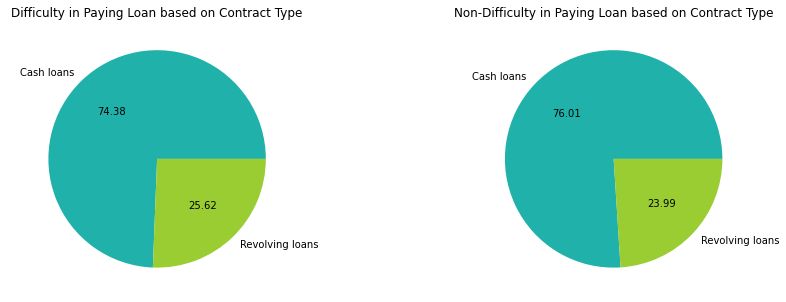

In [117]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
de["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct="%.2f",colors=["lightseagreen","yellowgreen"])
plt.title("Difficulty in Paying Loan based on Contract Type")
plt.ylabel(" ")
plt.subplot(1,2,2)
nd["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct="%.2f",colors=["lightseagreen","yellowgreen"])
plt.title("Non-Difficulty in Paying Loan based on Contract Type")
plt.ylabel(" ")
plt.show()

#### No change in ease or difficulty to repay loan on the bases of Contract Type

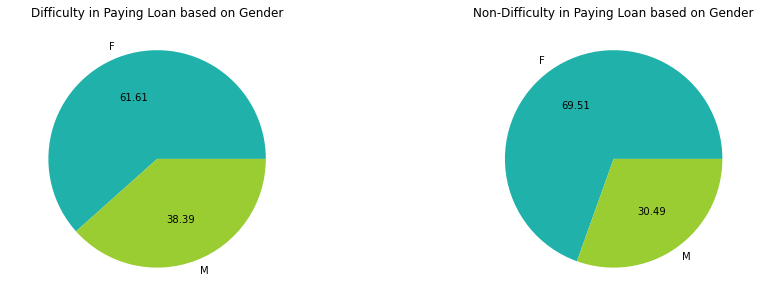

In [118]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
de["CODE_GENDER"].value_counts().plot.pie(autopct="%.2f",colors=["lightseagreen","yellowgreen"])
plt.title("Difficulty in Paying Loan based on Gender")
plt.ylabel(" ")
plt.subplot(1,2,2)
nd["CODE_GENDER"].value_counts().plot.pie(autopct="%.2f",colors=["lightseagreen","yellowgreen"])
plt.title("Non-Difficulty in Paying Loan based on Gender")
plt.ylabel(" ")
plt.show()

#### As females are majority in both cases, we can not conclude which gender is well-equiped to pay the loan. 
Even though there is a slight increase in percentage of Non-Difficulties for females, this is not enough for any claims.

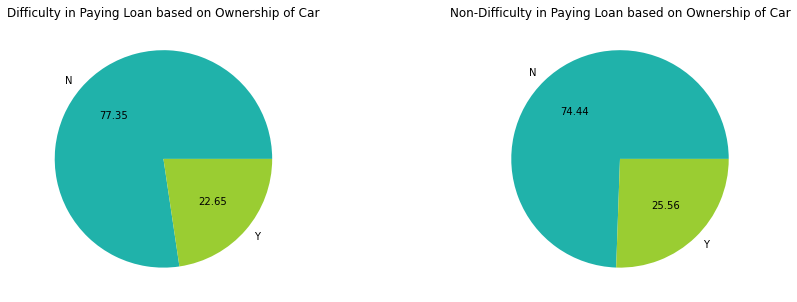

In [119]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
de["FLAG_OWN_CAR"].value_counts().plot.pie(autopct="%.2f",colors=["lightseagreen","yellowgreen"])
plt.title("Difficulty in Paying Loan based on Ownership of Car")
plt.ylabel(" ")
plt.subplot(1,2,2)
nd["FLAG_OWN_CAR"].value_counts().plot.pie(autopct="%.2f",colors=["lightseagreen","yellowgreen"])
plt.title("Non-Difficulty in Paying Loan based on Ownership of Car")
plt.ylabel(" ")
plt.show()

#### Almost similar percentage of people who does not own a car find it Deficult and Non-Deficult in repaying the loan. 
This means that does not owning a car or owning a car will not be a parameter to decide if one can repay the loan or not.

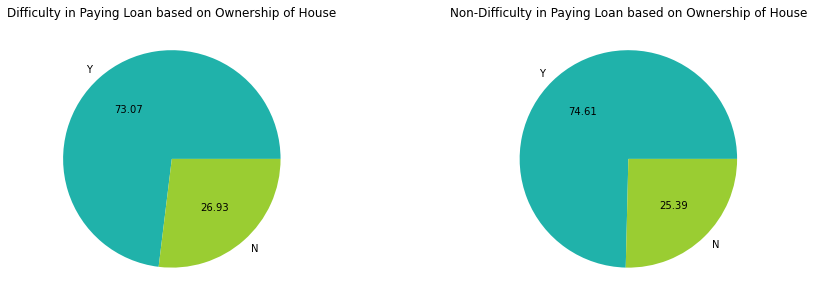

In [120]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
de["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct="%.2f",colors=["lightseagreen","yellowgreen"])
plt.title("Difficulty in Paying Loan based on Ownership of House")
plt.ylabel(" ")
plt.subplot(1,2,2)
nd["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct="%.2f",colors=["lightseagreen","yellowgreen"])
plt.title("Non-Difficulty in Paying Loan based on Ownership of House")
plt.ylabel(" ")
plt.show()

#### Almost similar percentage of people who does not own a home find it Deficult and Non-Deficult in repaying the loan. 
This means that does not owning a home or owning a home will not be a parameter to decide if one can repay the loan or not.

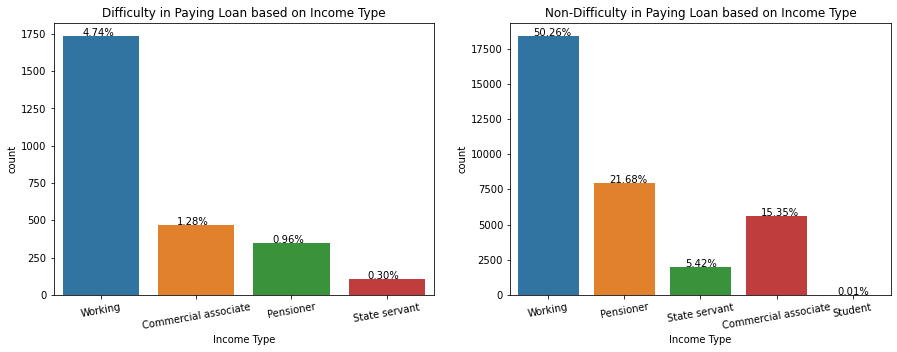

In [121]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=de["NAME_INCOME_TYPE"],ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=10)
for i in ax1.patches:
    ax1.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax1.set_xlabel("Income Type")
ax1.set_title("Difficulty in Paying Loan based on Income Type")

sns.countplot(x=nd["NAME_INCOME_TYPE"],ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=10)
for i in ax2.patches:
    ax2.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax2.set_xlabel("Income Type")
ax2.set_title("Non-Difficulty in Paying Loan based on Income Type")
plt.show()

#### No students default, one reason can be that they are not required to pay the loan while they are students
- Even though Pensioners contribute ~22% to the whole data, they only default >1%
- 55% of data is made up of Working Class - almost 9% of Working class are defaulters

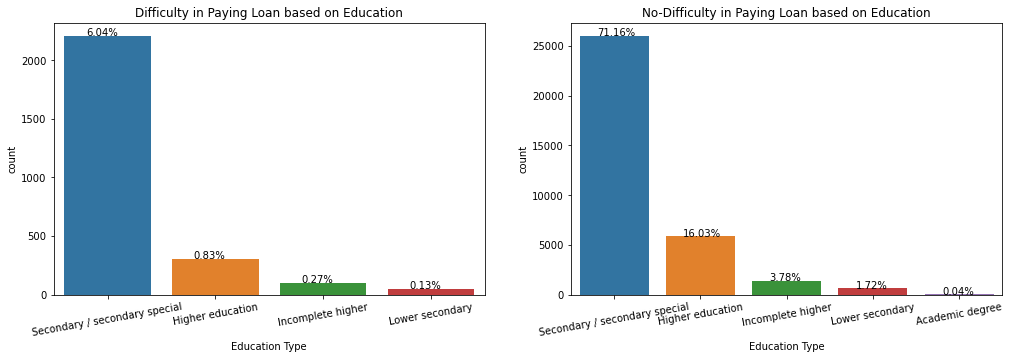

In [122]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(17,5))
sns.countplot(x=de["NAME_EDUCATION_TYPE"],ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=10)
for i in ax1.patches:
    ax1.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax1.set_xlabel("Education Type")
ax1.set_title("Difficulty in Paying Loan based on Education")

sns.countplot(x=nd["NAME_EDUCATION_TYPE"],ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=10)
for i in ax2.patches:
    ax2.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax2.set_xlabel("Education Type")
ax2.set_title("No-Difficulty in Paying Loan based on Education")
plt.show()

#### Higher Education has the most ease in repaying the loan

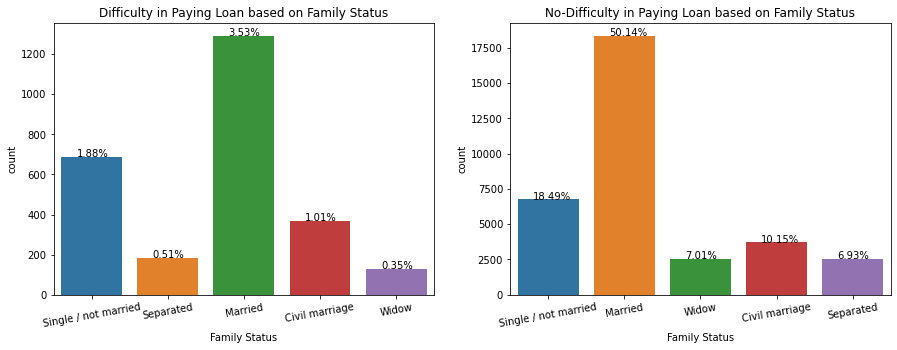

In [123]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=de["NAME_FAMILY_STATUS"],ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=10)
for i in ax1.patches:
    ax1.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax1.set_xlabel("Family Status")
ax1.set_title("Difficulty in Paying Loan based on Family Status")

sns.countplot(x=nd["NAME_FAMILY_STATUS"],ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=10)
for i in ax2.patches:
    ax2.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax2.set_xlabel("Family Status")
ax2.set_title("No-Difficulty in Paying Loan based on Family Status")
plt.show()

#### Widows have lowest % of difficulty in repaying the loan

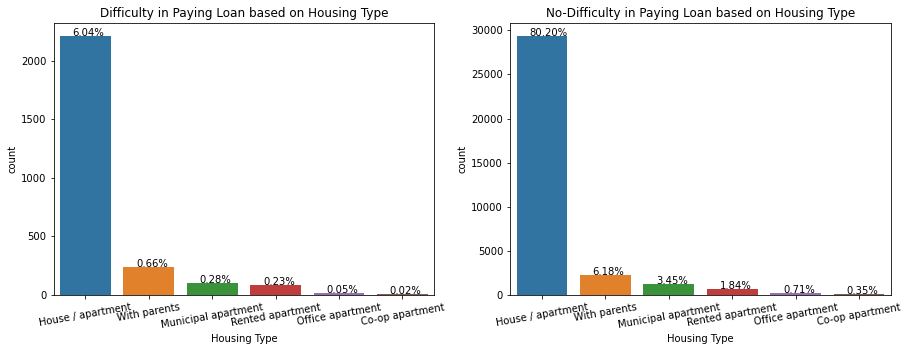

In [124]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=de["NAME_HOUSING_TYPE"],ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=10)
for i in ax1.patches:
    ax1.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax1.set_xlabel("Housing Type")
ax1.set_title("Difficulty in Paying Loan based on Housing Type")

sns.countplot(x=nd["NAME_HOUSING_TYPE"],ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=10)
for i in ax2.patches:
    ax2.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax2.set_xlabel("Housing Type")
ax2.set_title("No-Difficulty in Paying Loan based on Housing Type")
plt.show()

#### People who live in Co-op apartment don't have any difficulty in repaying the loan.
People who lives in a house has the highest difficulty and ease in repaying the loan, so it is not a good determining factor

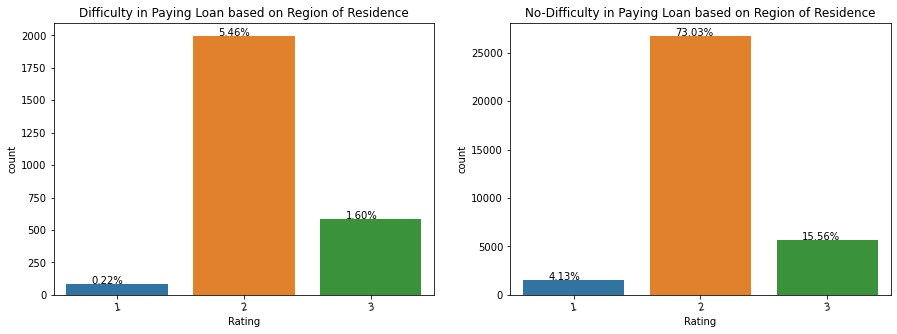

In [125]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=de["REGION_RATING_CLIENT"],ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=10)
for i in ax1.patches:
    ax1.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax1.set_xlabel("Rating")
ax1.set_title("Difficulty in Paying Loan based on Region of Residence")

sns.countplot(x=nd["REGION_RATING_CLIENT"],ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=10)
for i in ax2.patches:
    ax2.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax2.set_xlabel("Rating")
ax2.set_title("No-Difficulty in Paying Loan based on Region of Residence")
plt.show()

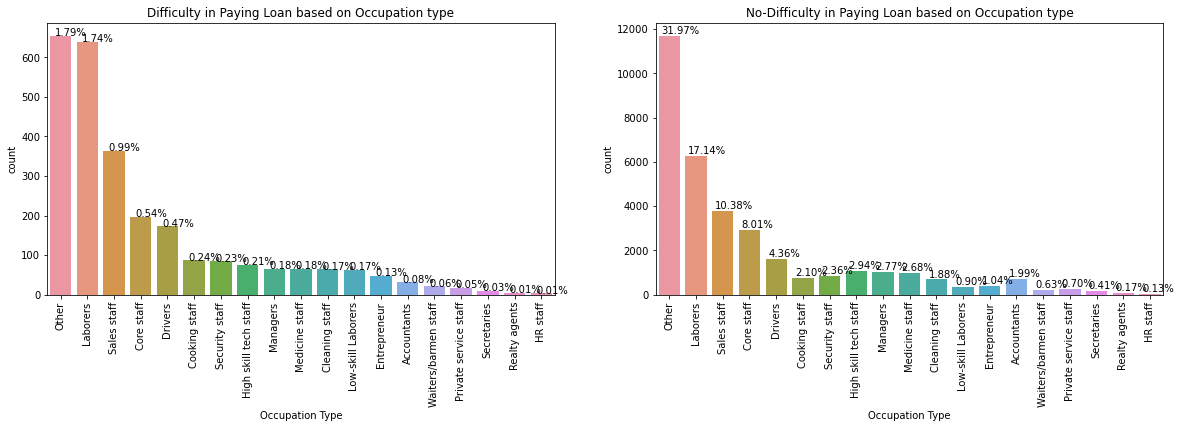

In [126]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x=de["OCCUPATION_TYPE"],ax=ax1,order=de["OCCUPATION_TYPE"].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
for i in ax1.patches:
    ax1.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax1.set_xlabel("Occupation Type")
ax1.set_title("Difficulty in Paying Loan based on Occupation type")

sns.countplot(x=nd["OCCUPATION_TYPE"],ax=ax2,order=de["OCCUPATION_TYPE"].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
for i in ax2.patches:
    ax2.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.1,i.get_height()+100))
ax2.set_xlabel("Occupation Type")
ax2.set_title("No-Difficulty in Paying Loan based on Occupation type")
plt.show()

#### 10% Laborers find it difficult to pay the loan
IT staff have no difficulty in repaying the load at all.
High skill tech staff and Managers has lower difficulty in paying

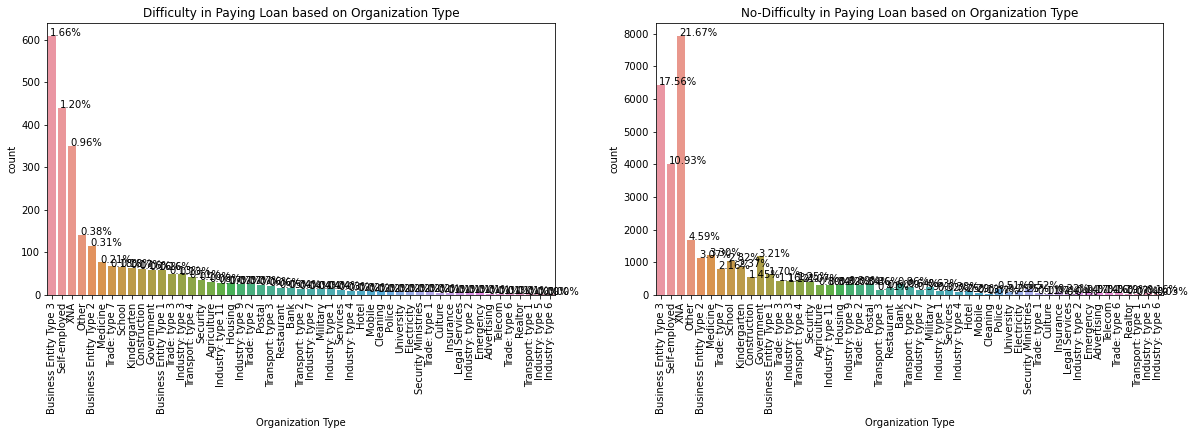

In [127]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x=de["ORGANIZATION_TYPE"],ax=ax1,order=de["ORGANIZATION_TYPE"].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
for i in ax1.patches:
    ax1.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax1.set_xlabel("Organization Type")
ax1.set_title("Difficulty in Paying Loan based on Organization Type")

sns.countplot(x=nd["ORGANIZATION_TYPE"],ax=ax2,order=de["ORGANIZATION_TYPE"].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
for i in ax2.patches:
    ax2.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax2.set_xlabel("Organization Type")
ax2.set_title("No-Difficulty in Paying Loan based on Organization Type")
plt.show()

#### Business entity type 3 and Self Employed is relatively more likely to have dificulty in repaying loan than paying it with ease

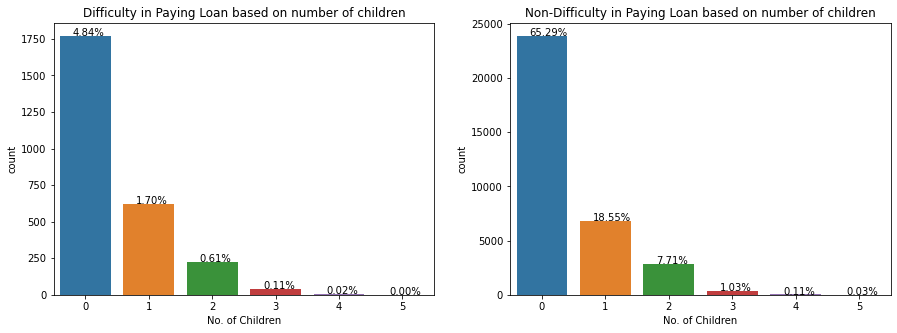

In [128]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=de["CNT_CHILDREN"],ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels())
for i in ax1.patches:
    ax1.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax1.set_xlabel("No. of Children")
ax1.set_title("Difficulty in Paying Loan based on number of children")

sns.countplot(x=nd["CNT_CHILDREN"],ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels())
for i in ax2.patches:
    ax2.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax2.set_xlabel("No. of Children")
ax2.set_title("Non-Difficulty in Paying Loan based on number of children")
plt.show()

#### No inference can be made with number of children

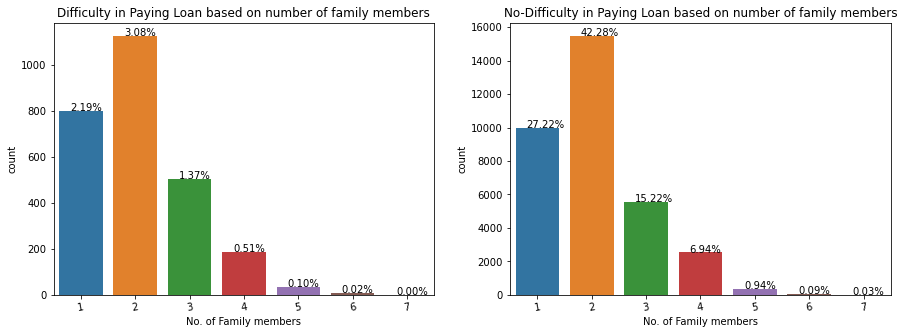

In [129]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=de["CNT_FAM_MEMBERS"],ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=10)
for i in ax1.patches:
    ax1.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax1.set_xlabel("No. of Family members")
ax1.set_title("Difficulty in Paying Loan based on number of family members")

sns.countplot(x=nd["CNT_FAM_MEMBERS"],ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=10)
for i in ax2.patches:
    ax2.annotate("{:.2f}%".format((i.get_height()/len(app_data))*100),(i.get_x()+0.2,i.get_height()))
ax2.set_xlabel("No. of Family members")
ax2.set_title("No-Difficulty in Paying Loan based on number of family members")
plt.show()

#### No inference can be made from number of family members

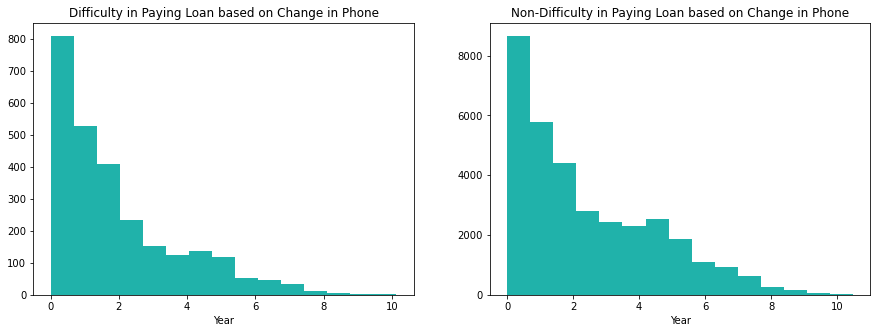

In [130]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(de["DAYS_LAST_PHONE_CHANGE"],bins=15,color="lightseagreen")
plt.title("Difficulty in Paying Loan based on Change in Phone")
plt.xlabel("Year")
plt.subplot(1,2,2)
plt.hist(nd["DAYS_LAST_PHONE_CHANGE"],bins=15,color="lightseagreen")
plt.title("Non-Difficulty in Paying Loan based on Change in Phone")
plt.xlabel("Year")
plt.show()

#### It is most likely if a person has the same phone for 3 years, they will have less difficulty in repaying the loan
- This can be an indication to their healthy habits of managing expenses 

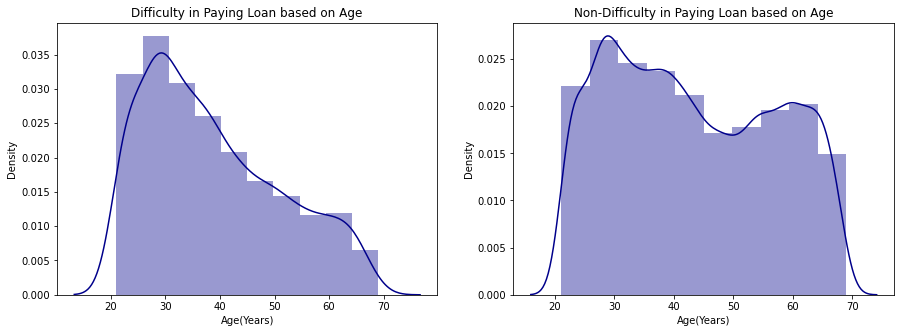

In [131]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(de["DAYS_BIRTH"],bins=10,color="darkblue")
plt.title("Difficulty in Paying Loan based on Age")
plt.xlabel("Age(Years)")
plt.subplot(1,2,2)
sns.distplot(nd["DAYS_BIRTH"],bins=10,color="darkblue")
plt.title("Non-Difficulty in Paying Loan based on Age")
plt.xlabel("Age(Years)")
plt.show()

#### People between the range 45-70 years of age have the highest ease of repaying the loan

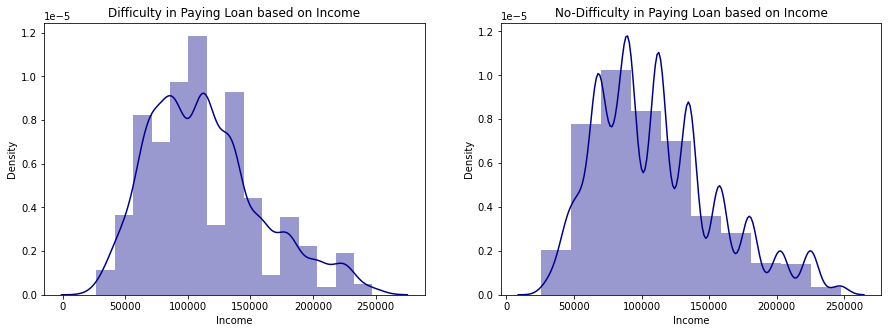

In [132]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(de["AMT_INCOME_TOTAL"],bins=15,color="darkblue")
plt.title("Difficulty in Paying Loan based on Income")
plt.xlabel("Income")
plt.subplot(1,2,2)
sns.distplot(nd["AMT_INCOME_TOTAL"],bins=10,color="darkblue")
plt.title("No-Difficulty in Paying Loan based on Income")
plt.xlabel("Income")
plt.show()

#### No inference can be made

# Bivariate analysis on Application Data

#### Checking correlation between different columns

In [133]:
corr_de = de.corr()
corr_de = corr_de.drop(["TARGET","FLAG_MOBIL"], axis=0)
corr_de = corr_de.drop(["TARGET","FLAG_MOBIL"], axis=1)
corr_nd = nd.corr()
corr_nd = corr_nd.drop(["TARGET","FLAG_MOBIL"], axis=0)
corr_nd = corr_nd.drop(["TARGET","FLAG_MOBIL"], axis=1)

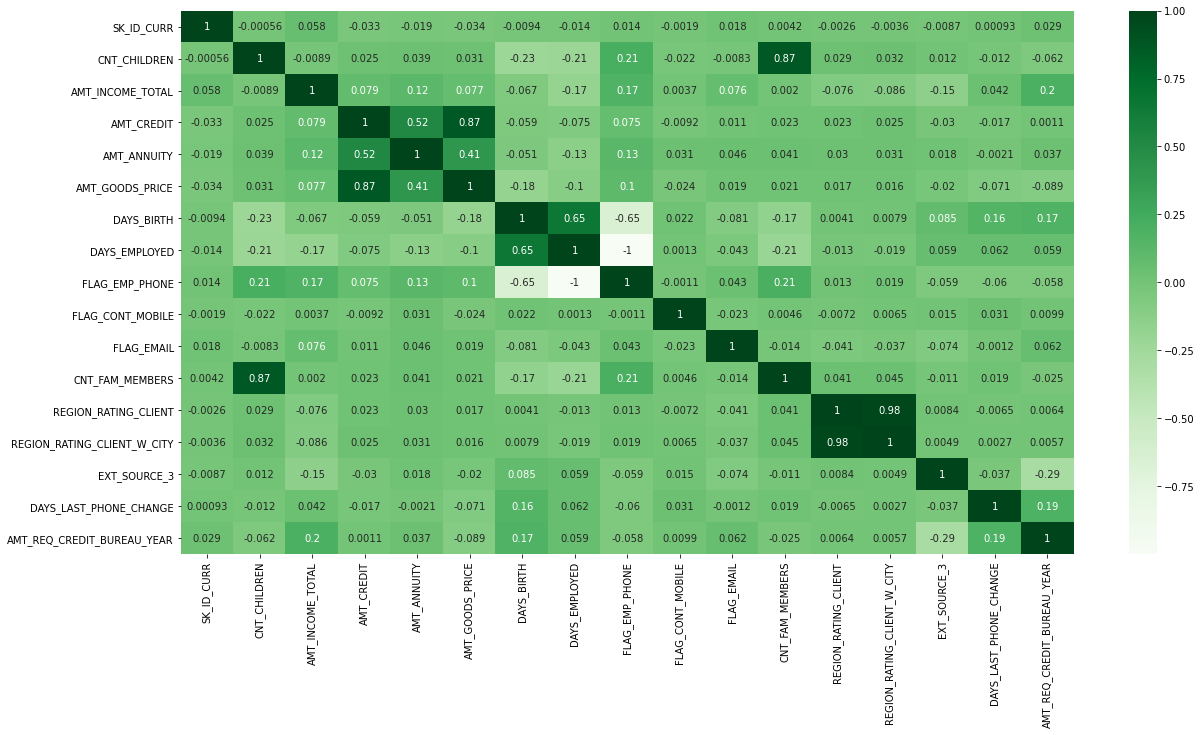

In [134]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_de,cmap="Greens",annot=True)
plt.show()

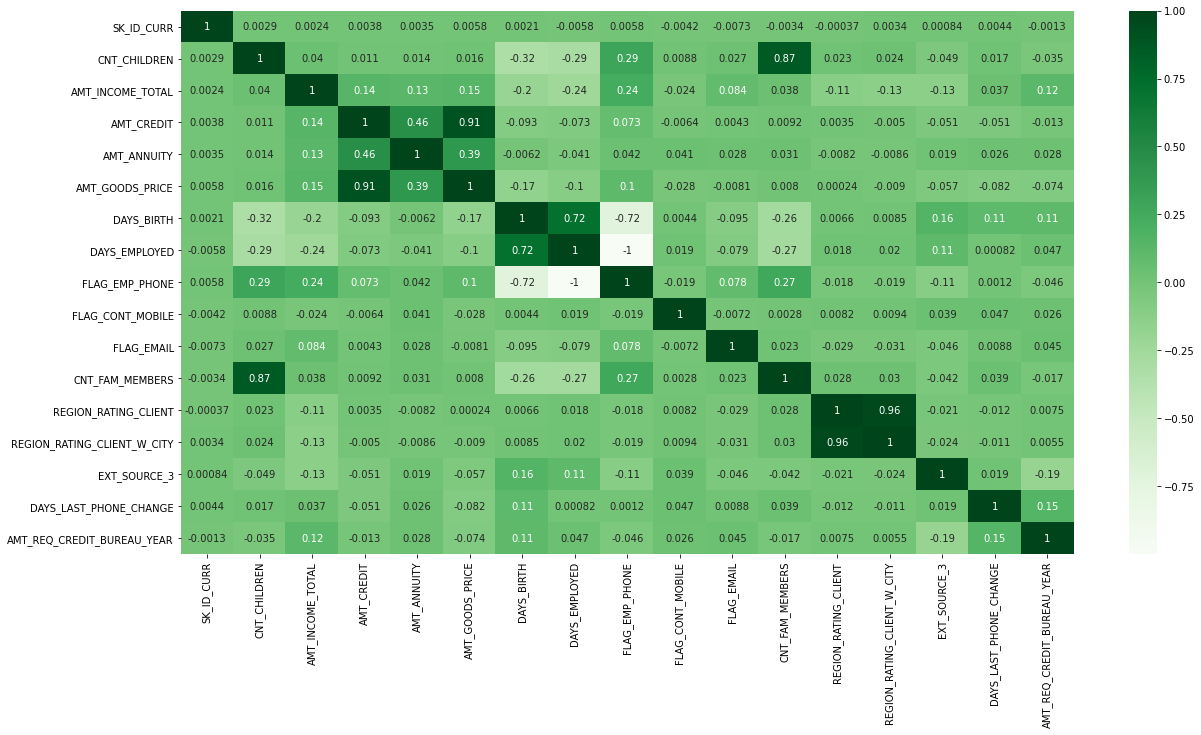

In [135]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_nd,cmap="Greens",annot=True)
plt.show()

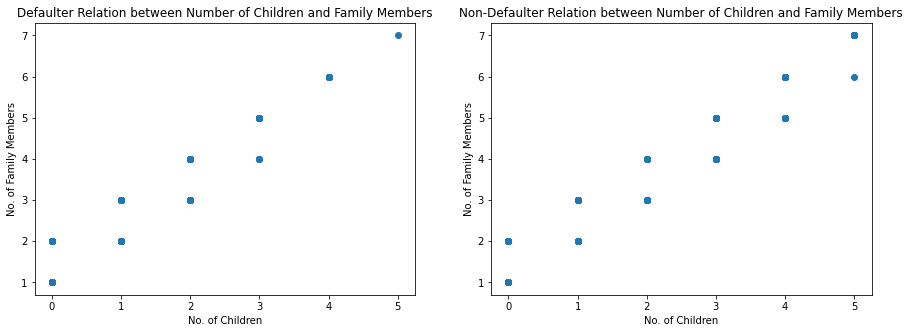

In [136]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x = de["CNT_CHILDREN"], y = de["CNT_FAM_MEMBERS"])
plt.xlabel("No. of Children")
plt.ylabel("No. of Family Members")
plt.title("Defaulter Relation between Number of Children and Family Members")
plt.subplot(1,2,2)
plt.scatter(x = nd["CNT_CHILDREN"], y = nd["CNT_FAM_MEMBERS"])
plt.xlabel("No. of Children")
plt.ylabel("No. of Family Members")
plt.title("Non-Defaulter Relation between Number of Children and Family Members")
plt.show()

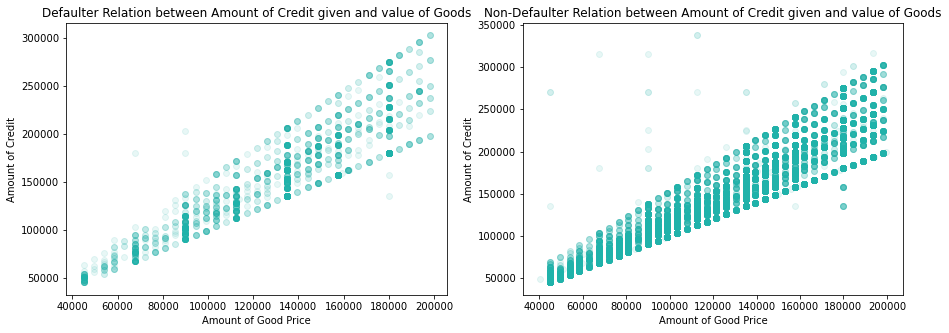

In [137]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x = de["AMT_GOODS_PRICE"], y = de["AMT_CREDIT"],alpha=0.1,color="lightseagreen")
plt.xlabel("Amount of Good Price")
plt.ylabel("Amount of Credit")
plt.title("Defaulter Relation between Amount of Credit given and value of Goods")
plt.subplot(1,2,2)
plt.scatter(x = nd["AMT_GOODS_PRICE"], y = nd["AMT_CREDIT"],alpha=0.1,color="lightseagreen")
plt.xlabel("Amount of Good Price")
plt.ylabel("Amount of Credit")
plt.title("Non-Defaulter Relation between Amount of Credit given and value of Goods")
plt.show()

#### Non-Defaulters show that even though the credit amount is variable on the same value of goods, there is no problem

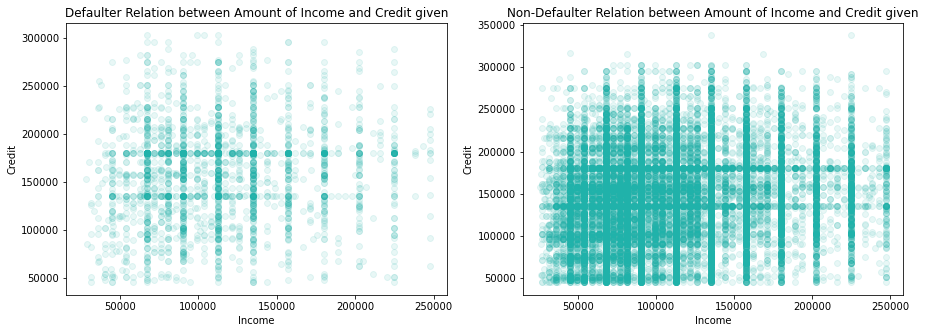

In [138]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x = de["AMT_INCOME_TOTAL"], y = de["AMT_CREDIT"],alpha=0.1,color="lightseagreen")
plt.xlabel("Income")
plt.ylabel("Credit")
plt.title("Defaulter Relation between Amount of Income and Credit given")
plt.subplot(1,2,2)
plt.scatter(x = nd["AMT_INCOME_TOTAL"], y = nd["AMT_CREDIT"],alpha=0.1,color="lightseagreen")
plt.xlabel("Income")
plt.ylabel("Credit")
plt.title("Non-Defaulter Relation between Amount of Income and Credit given")
plt.show()

#### Non-Defaulters and Defaulters both are from lower income category
- But Non-Defaulters are more

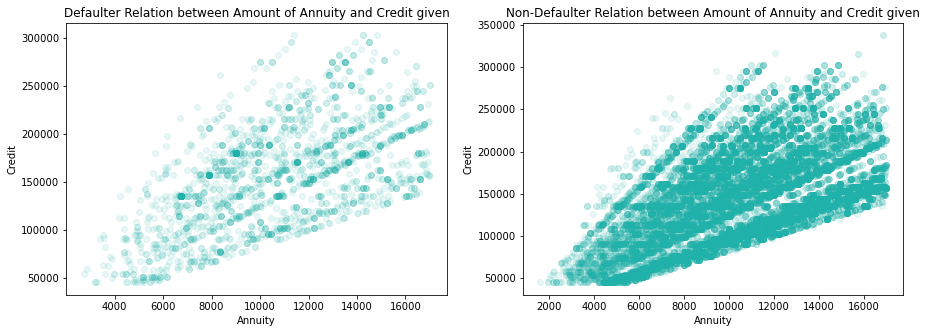

In [139]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x = de["AMT_ANNUITY"], y = de["AMT_CREDIT"],alpha=0.1,color="lightseagreen")
plt.xlabel("Annuity")
plt.ylabel("Credit")
plt.title("Defaulter Relation between Amount of Annuity and Credit given")
plt.subplot(1,2,2)
plt.scatter(x = nd["AMT_ANNUITY"], y = nd["AMT_CREDIT"],alpha=0.1,color="lightseagreen")
plt.xlabel("Annuity")
plt.ylabel("Credit")
plt.title("Non-Defaulter Relation between Amount of Annuity and Credit given")
plt.show()

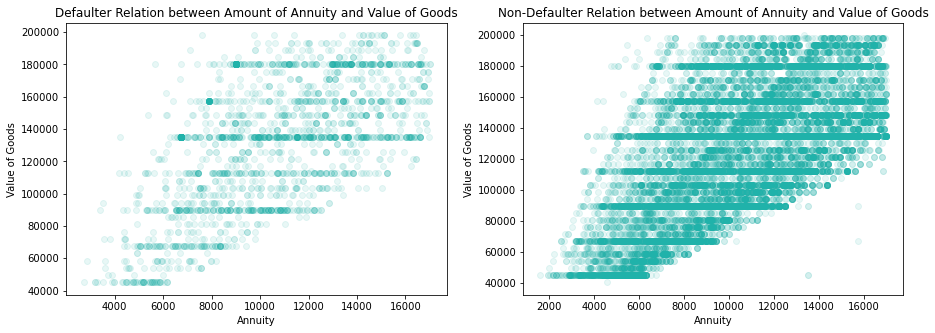

In [140]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x = de["AMT_ANNUITY"], y = de["AMT_GOODS_PRICE"],alpha=0.1,color="lightseagreen")
plt.xlabel("Annuity")
plt.ylabel("Value of Goods")
plt.title("Defaulter Relation between Amount of Annuity and Value of Goods")
plt.subplot(1,2,2)
plt.scatter(x = nd["AMT_ANNUITY"], y = nd["AMT_GOODS_PRICE"],alpha=0.1,color="lightseagreen")
plt.xlabel("Annuity")
plt.ylabel("Value of Goods")
plt.title("Non-Defaulter Relation between Amount of Annuity and Value of Goods")
plt.show()

# Univariate Analysis on Previous Application

In [141]:
prev_app.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

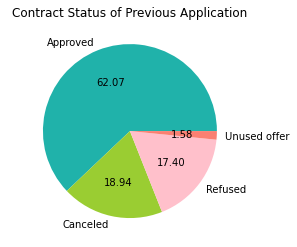

In [142]:
prev_app["NAME_CONTRACT_STATUS"].value_counts().plot.pie(autopct="%.2f",colors=["lightseagreen","yellowgreen","pink","salmon"])
plt.title("Contract Status of Previous Application")
plt.ylabel(" ")
plt.show()

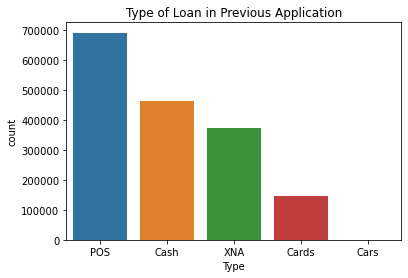

In [143]:
sns.countplot(x=prev_app["NAME_PORTFOLIO"],order=prev_app["NAME_PORTFOLIO"].value_counts().index)
plt.xlabel("Type")
plt.title("Type of Loan in Previous Application")
plt.show()

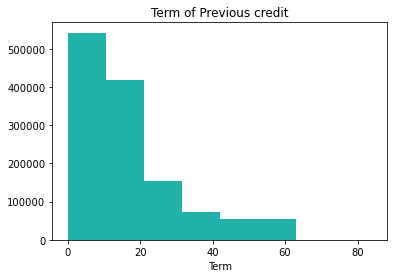

In [144]:
plt.hist(prev_app["CNT_PAYMENT"],bins=8,color="lightseagreen")
plt.title("Term of Previous credit")
plt.xlabel("Term")
plt.show()

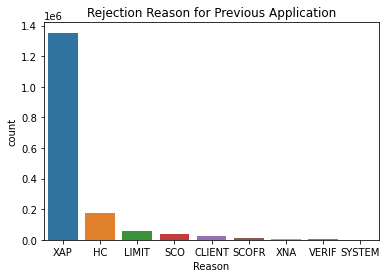

In [145]:
sns.countplot(x=prev_app["CODE_REJECT_REASON"],order=prev_app["CODE_REJECT_REASON"].value_counts().index)
plt.xlabel("Reason")
plt.title("Rejection Reason for Previous Application")
plt.show()

#### Here XAP refers to Not applicable becuase the loan was approved
- So to know the actual reason, we remove the approved ones(XAP)

In [146]:
prev_app.drop(prev_app[prev_app["CODE_REJECT_REASON"]=="XAP"].index,inplace=True)

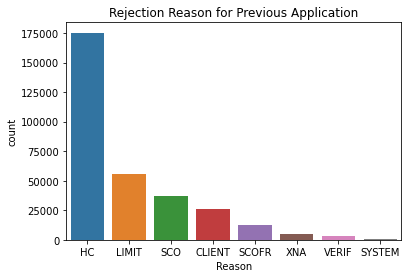

In [147]:
sns.countplot(x=prev_app["CODE_REJECT_REASON"],order=prev_app["CODE_REJECT_REASON"].value_counts().index)
plt.xlabel("Reason")
plt.title("Rejection Reason for Previous Application")
plt.show()

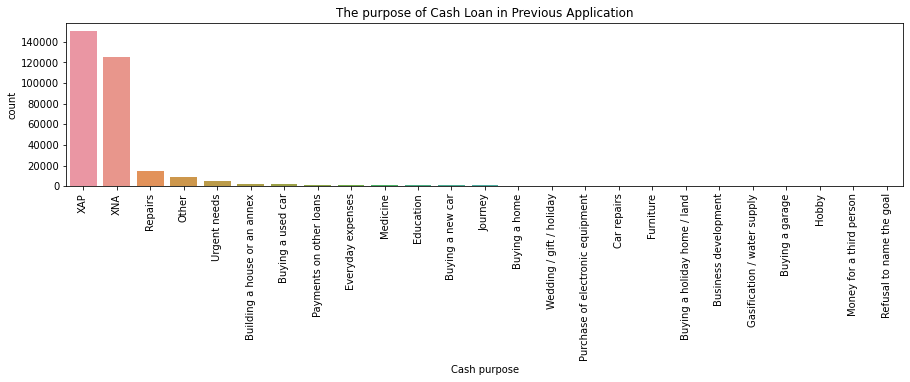

In [148]:
plt.figure(figsize=(15,3))
sns.countplot(x=prev_app["NAME_CASH_LOAN_PURPOSE"],order=prev_app["NAME_CASH_LOAN_PURPOSE"].value_counts().index)
plt.xlabel("Cash purpose")
plt.title("The purpose of Cash Loan in Previous Application")
plt.xticks(rotation=90)
plt.show()

#### Removing XAP as it means not applicable which implies that the loan would be cashless and XNA because it means that the reason might be unavailable

In [149]:
prev_app.drop(prev_app[prev_app["NAME_CASH_LOAN_PURPOSE"]=="XAP"].index,inplace=True)

In [150]:
prev_app.drop(prev_app[prev_app["NAME_CASH_LOAN_PURPOSE"]=="XNA"].index,inplace=True)

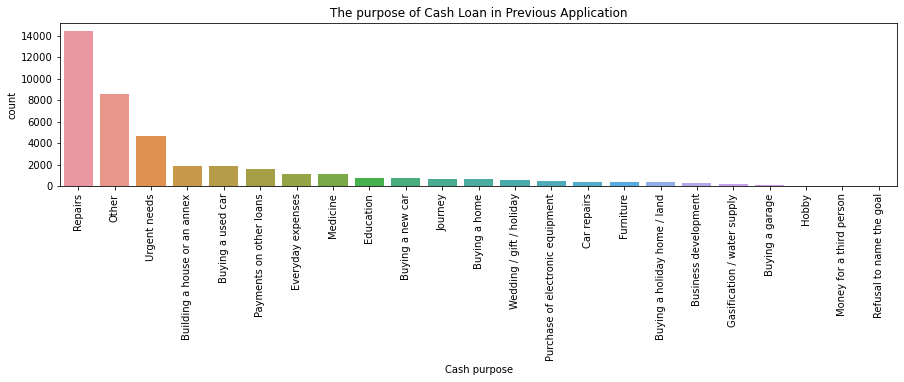

In [151]:
plt.figure(figsize=(15,3))
sns.countplot(x=prev_app["NAME_CASH_LOAN_PURPOSE"],order=prev_app["NAME_CASH_LOAN_PURPOSE"].value_counts().index)
plt.xlabel("Cash purpose")
plt.title("The purpose of Cash Loan in Previous Application")
plt.xticks(rotation=90)
plt.show()

#### Repairs seems to be the most common reason for a cash loan. 

## Bivariate Analysis on Previous Data

<Figure size 1440x360 with 0 Axes>

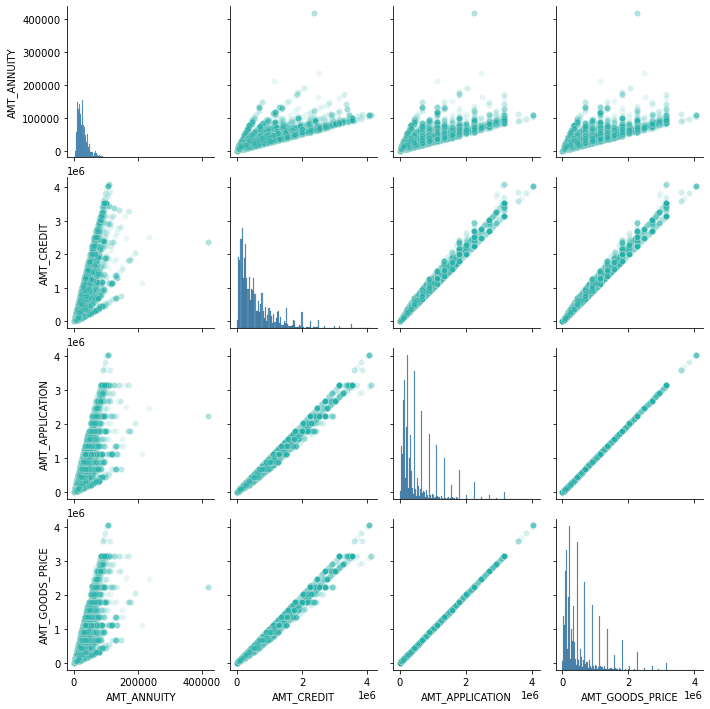

In [152]:
plt.figure(figsize=(20,5))
sns.pairplot(prev_app[["AMT_ANNUITY","AMT_CREDIT","AMT_APPLICATION","AMT_GOODS_PRICE"]],
             plot_kws={"alpha":0.1,"color":"lightseagreen"})
plt.show()

#### Same Annuity for large variety of Value of goods

#### Amount of Annuity is lower as compared to the amount of Goods Price

# Merging Application Data and Previous Application Data

In [153]:
mer_data = pd.merge(left=app_data,right=prev_app,how="right",left_on="SK_ID_CURR",right_on="SK_ID_CURR")

In [154]:
mer_data.shape

(41063, 43)

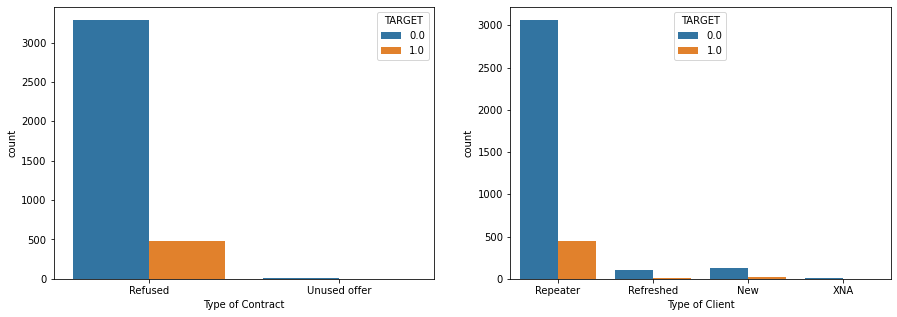

In [155]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(mer_data["NAME_CONTRACT_STATUS"],hue=mer_data["TARGET"])
plt.xlabel("Type of Contract")
plt.subplot(1,2,2)
sns.countplot(mer_data["NAME_CLIENT_TYPE"],hue=mer_data["TARGET"])
plt.xlabel("Type of Client")
plt.show()

#### A lot of current Non-Defaulters were Refused for loan previously

#### It is more likely a person who has No difficulty in repaying the loan will apply for a loan again

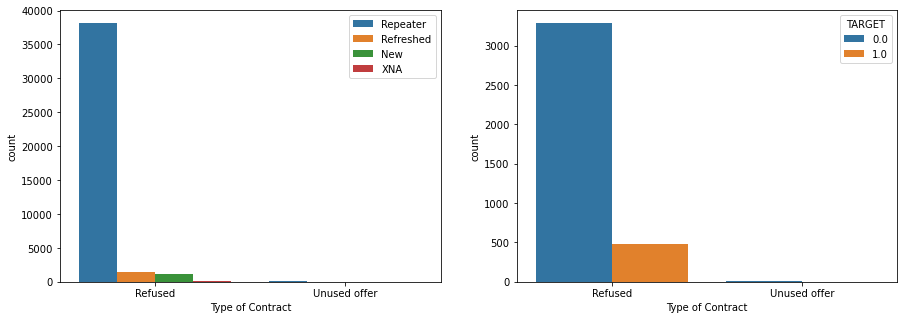

In [156]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(mer_data["NAME_CONTRACT_STATUS"],hue=mer_data["NAME_CLIENT_TYPE"])
plt.xlabel("Type of Contract")
plt.legend(loc="upper right")
plt.subplot(1,2,2)
sns.countplot(mer_data["NAME_CONTRACT_STATUS"],hue=mer_data["TARGET"])
plt.xlabel("Type of Contract")
plt.show()

#### Major Refusals are for repeaters but major currect Non-Defaulters were refused previously

# Insights

#### Application Data

- Pensioners are least likely to be Defaulters followed by State Servants.
    They have the lowest Defaulter % - (No. of Defaulters as Pensioners/ Total number of Pensioners)*100
- People with Lower Secondary Education are most likely to be Defaulters.
    They have the highes Defaulter % - (No. of Defaulters as Lower Secondary Education/ Total number of Lower Secondary Education)*100
- People with Higher Education are most likely to repay Loan
- Widows have the highest % of replaying the loan with ease
- People between the ages 40-70 years have a lower possibility of being a Defaulter

#### Previous Data

- Repeaters are refused the most
- Repairs is the most common stated reason for having a cash loan

#### Merged Data

- Majority of the refusals previously was done to current Non-Defaulters
- Repeaters are majorly Non-Defaulters